# Image Data Generator

How to Normalize, Center, and Standardize Image Pixels

the references are taken from 

 - https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C2/W1/ungraded_lab/C2_W1_Lab_1_cats_vs_dogs.ipynb
 - https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/

In [103]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory # 'tis a function
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files

In [104]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-12-20 10:37:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  19.8MB/s    in 4.1s    

2022-12-20 10:37:55 (15.8 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [105]:
# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [106]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print('base dir is:', base_dir)
print('')

print('train dir is :', train_dir)
print('validation dir is :', validation_dir)

print('')
print('train cats dir is:', train_cats_dir)
print('train dogs dir is:', train_dogs_dir)

print()
print('validation cats dir:', validation_cats_dir)
print('validation dogs dir:', validation_dogs_dir)


base dir is: cats_and_dogs_filtered

train dir is : cats_and_dogs_filtered/train
validation dir is : cats_and_dogs_filtered/validation

train cats dir is: cats_and_dogs_filtered/train/cats
train dogs dir is: cats_and_dogs_filtered/train/dogs

validation cats dir: cats_and_dogs_filtered/validation/cats
validation dogs dir: cats_and_dogs_filtered/validation/dogs


## Image data generator

The three main types of pixel scaling techniques supported by the ImageDataGenerator class are as follows:

 - **Pixel Normalization**: scale pixel values to the range 0-1.
 - **Pixel Centering**: scale pixel values to have a zero mean.
 - **Pixel Standardization**: scale pixel values to have a zero mean and unit variance

The pixel standardization is supported at two levels: either per-image (called sample-wise) or per-dataset (called feature-wise). Specifically, the mean and/or mean and standard deviation statistics required to standardize pixel values can be calculated from the pixel values in each image only (sample-wise) or across the entire training dataset (feature-wise).


### Pixel Normalization: scale pixel values to the range 0-1.

Rescaling pixel values from the range of 0-255 to the range 0-1. Scaling data to the range of 0-1 is traditionally referred to as **normalization**. Achieved by setting the rescale argument to a ratio by which each pixel can be multiplied to achieve the desired range, in this case, the ratio is 1/255.



In [107]:

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

## The ImageDataGenerator does not need to be fit in this case because there are no global statistics that need to be calculated.

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [108]:
print('Batches train=%d, test=%d' % (len(train_generator), len(validation_generator)))

Batches train=100, test=50


2000 images in training set, with batch size =20 then the total batches for train is 2000/20 = 100

and for validation set, 1000 images with 20 batch size then there is 50 batches

In [109]:
# confirm the scaling works
batchX, batchy = train_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

batchX, batchy = validation_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(20, 150, 150, 3), min=0.000, max=1.000
Batch shape=(20, 150, 150, 3), min=0.000, max=1.000


#### building small model 

In [110]:
def create_model():
  ## set seed so that model has same 'common ground' (it node's weight and bias are the same value on each creation)
  tf.random.set_seed(10)
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [111]:

model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

##### for plotting history

In [112]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

##### Train the model

##### parameter for training

In [113]:
# Constant for epochs
EPOCHS = 20

train_steps_per_epoch = len(train_generator.labels)/train_generator.batch_size
validation_steps_per_epoch = len(validation_generator.labels)/validation_generator.batch_size

print('train_steps_per_epoch:', train_steps_per_epoch )

print('validation_steps_per_epoch:', validation_steps_per_epoch )
     


train_steps_per_epoch: 100.0
validation_steps_per_epoch: 50.0


In [114]:
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_steps_per_epoch,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=validation_steps_per_epoch,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 10s - loss: 0.6929 - accuracy: 0.5260 - val_loss: 0.6739 - val_accuracy: 0.6250 - 10s/epoch - 95ms/step
Epoch 2/20
100/100 - 9s - loss: 0.6609 - accuracy: 0.6130 - val_loss: 0.6358 - val_accuracy: 0.6520 - 9s/epoch - 85ms/step
Epoch 3/20
100/100 - 8s - loss: 0.6202 - accuracy: 0.6580 - val_loss: 0.6265 - val_accuracy: 0.6520 - 8s/epoch - 84ms/step
Epoch 4/20
100/100 - 9s - loss: 0.5741 - accuracy: 0.7070 - val_loss: 0.5795 - val_accuracy: 0.6990 - 9s/epoch - 86ms/step
Epoch 5/20
100/100 - 8s - loss: 0.5336 - accuracy: 0.7205 - val_loss: 0.5760 - val_accuracy: 0.6910 - 8s/epoch - 85ms/step
Epoch 6/20
100/100 - 8s - loss: 0.5079 - accuracy: 0.7530 - val_loss: 0.5877 - val_accuracy: 0.6960 - 8s/epoch - 85ms/step
Epoch 7/20
100/100 - 9s - loss: 0.4816 - accuracy: 0.7665 - val_loss: 0.5594 - val_accuracy: 0.7240 - 9s/epoch - 89ms/step
Epoch 8/20
100/100 - 9s - loss: 0.4570 - accuracy: 0.7880 - val_loss: 0.5662 - val_accuracy: 0.7160 - 9s/epoch - 86ms/step
Epoch 9/20
100

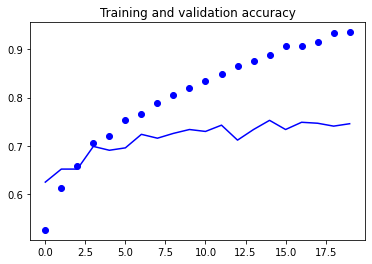

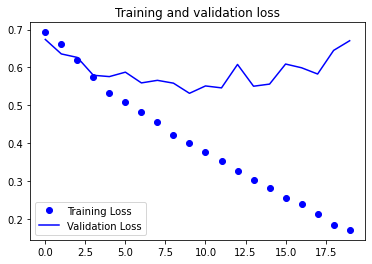

In [115]:
# Plot training results
plot_loss_acc(history)

the training accuracy is more than 90%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. One method to solve this problemis data augmentation but let us discuss it in another session. Now we try to do other scaling method and see if it helps in solvng overfitting and overall model performance i.e its accuracy

### Center Images With ImageDataGenerator

calculate the mean pixel value across the entire training dataset, then subtract it from each image. This is called centering and has the effect of centering the distribution of pixel values on zero: that is, the mean pixel value for centered images will be zero.

#### featurewise

we create temporary datagen to collect all the pixel values

In [116]:
train_datagen_tmp = ImageDataGenerator()
test_datagen_tmp  = ImageDataGenerator()

train_generator_tmp = train_datagen_tmp.flow_from_directory(train_dir,
                                                    batch_size=2000, # all 2000 images loaded in one single batch
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
validation_generator_tmp =  test_datagen_tmp.flow_from_directory(validation_dir,
                                                         batch_size=1000, # all 1000 images loaded in one single batch
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

print('Batches train=%d, test=%d' % (len(train_generator_tmp), len(validation_generator_tmp)))
batchX_train, batchy_train = train_generator_tmp.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f' % (batchX_train.shape, batchX_train.min(),
                                                        batchX_train.max(), batchX_train.mean()))

batchX_validation, batchy_validation = validation_generator_tmp.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f' % (batchX_validation.shape, batchX_validation.min(),
                                                        batchX_validation.max(), batchX_validation.mean()))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Batches train=1, test=1
Batch shape=(2000, 150, 150, 3), min=0.000, max=255.000 mean=114.850
Batch shape=(1000, 150, 150, 3), min=0.000, max=255.000 mean=115.987


In [117]:
# create generator that centers pixel values
train_datagen = ImageDataGenerator( featurewise_center=True )
test_datagen  = ImageDataGenerator( featurewise_center=True )
print(batchX_train.shape)
print(batchX_validation.shape)

# calculate the mean on the training dataset
train_datagen.fit(batchX_train)
test_datagen.fit(batchX_validation)

# print the mean calculated on the training dataset.
print('train_datagen mean',  train_datagen.mean)
print('test_datagen mean',  test_datagen.mean)


(2000, 150, 150, 3)
(1000, 150, 150, 3)
train_datagen mean [[[95.44372 95.44372 95.44372]]]
test_datagen mean [[[123.49026 114.23884 104.06879]]]


In [118]:
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [119]:
# confirm the scaling works
batchX, batchy = train_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f' % (batchX.shape, batchX.min(), batchX.max(), batchX.mean()))

batchX, batchy = validation_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f' % (batchX.shape, batchX.min(), batchX.max(), batchX.mean()))

Batch shape=(20, 150, 150, 3), min=-95.444, max=159.556 mean=21.550
Batch shape=(20, 150, 150, 3), min=-123.490, max=150.931 mean=15.194


Still not get it right..i know...but what we've done there is  the general step

In [120]:
# Constant for epochs
EPOCHS = 20

train_steps_per_epoch = len(train_generator.labels)/train_generator.batch_size
validation_steps_per_epoch = len(validation_generator.labels)/validation_generator.batch_size

print('train_steps_per_epoch:', train_steps_per_epoch )

print('validation_steps_per_epoch:', validation_steps_per_epoch )
     

train_steps_per_epoch: 100.0
validation_steps_per_epoch: 50.0


In [121]:
# Train the model
model = create_model()
history = model.fit(
      train_generator,
      steps_per_epoch=train_steps_per_epoch,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=validation_steps_per_epoch,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 10s - loss: 2.0795 - accuracy: 0.5675 - val_loss: 0.7180 - val_accuracy: 0.5890 - 10s/epoch - 101ms/step
Epoch 2/20
100/100 - 9s - loss: 0.6132 - accuracy: 0.6870 - val_loss: 0.6816 - val_accuracy: 0.6340 - 9s/epoch - 92ms/step
Epoch 3/20
100/100 - 9s - loss: 0.4285 - accuracy: 0.8010 - val_loss: 0.6742 - val_accuracy: 0.6790 - 9s/epoch - 90ms/step
Epoch 4/20
100/100 - 9s - loss: 0.3092 - accuracy: 0.8670 - val_loss: 0.6958 - val_accuracy: 0.6890 - 9s/epoch - 90ms/step
Epoch 5/20
100/100 - 11s - loss: 0.1935 - accuracy: 0.9340 - val_loss: 0.8127 - val_accuracy: 0.6840 - 11s/epoch - 113ms/step
Epoch 6/20
100/100 - 9s - loss: 0.1237 - accuracy: 0.9570 - val_loss: 1.1129 - val_accuracy: 0.6500 - 9s/epoch - 91ms/step
Epoch 7/20
100/100 - 9s - loss: 0.0903 - accuracy: 0.9700 - val_loss: 1.9767 - val_accuracy: 0.5810 - 9s/epoch - 90ms/step
Epoch 8/20
100/100 - 9s - loss: 0.0654 - accuracy: 0.9810 - val_loss: 1.2337 - val_accuracy: 0.6500 - 9s/epoch - 91ms/step
Epoch 9/20

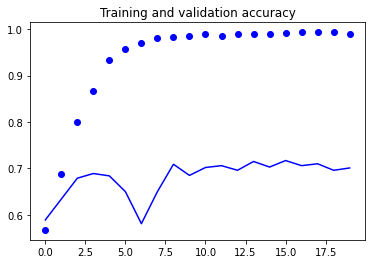

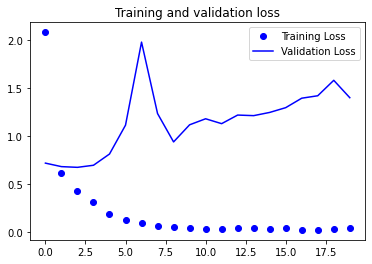

In [122]:
# Plot training results
plot_loss_acc(history)

The training hits 99% but not much on the validation, the overfitting problem does not getting any better


### sample-wise centering using ImageDataGenerator

calculating of the mean pixel value for each image  

In [123]:
# create generator that centers pixel values
train_datagen = ImageDataGenerator( samplewise_center=True )
test_datagen  = ImageDataGenerator( samplewise_center=True )

# It does not require any statistics to be calculated on the training dataset, so we skip the fit() part.
# print the mean calculated on the training dataset.
print('train_datagen mean',  train_datagen.mean)
print('test_datagen mean',  test_datagen.mean)


train_datagen mean None
test_datagen mean None


In [124]:
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


batchX, batchy = train_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f' % (batchX.shape, batchX.min(), batchX.max(), batchX.mean()))

batchX, batchy = validation_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f' % (batchX.shape, batchX.min(), batchX.max(), batchX.mean()))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Batch shape=(20, 150, 150, 3), min=-159.393, max=207.142 mean=0.000
Batch shape=(20, 150, 150, 3), min=-165.936, max=177.933 mean=-0.000


now with samplewise method we get the objective of centering that is mean=0

In [125]:
# Train the model
model = create_model()
history = model.fit(
      train_generator,
      steps_per_epoch=train_steps_per_epoch,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=validation_steps_per_epoch,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 10s - loss: 2.0298 - accuracy: 0.5610 - val_loss: 0.6724 - val_accuracy: 0.6160 - 10s/epoch - 97ms/step
Epoch 2/20
100/100 - 9s - loss: 0.6063 - accuracy: 0.6765 - val_loss: 0.6462 - val_accuracy: 0.6510 - 9s/epoch - 88ms/step
Epoch 3/20
100/100 - 9s - loss: 0.4163 - accuracy: 0.8145 - val_loss: 0.7223 - val_accuracy: 0.6390 - 9s/epoch - 88ms/step
Epoch 4/20
100/100 - 9s - loss: 0.2620 - accuracy: 0.8945 - val_loss: 0.7872 - val_accuracy: 0.6650 - 9s/epoch - 87ms/step
Epoch 5/20
100/100 - 9s - loss: 0.1633 - accuracy: 0.9415 - val_loss: 0.7657 - val_accuracy: 0.6920 - 9s/epoch - 88ms/step
Epoch 6/20
100/100 - 9s - loss: 0.1051 - accuracy: 0.9690 - val_loss: 0.9339 - val_accuracy: 0.6770 - 9s/epoch - 87ms/step
Epoch 7/20
100/100 - 9s - loss: 0.0884 - accuracy: 0.9710 - val_loss: 1.0091 - val_accuracy: 0.6820 - 9s/epoch - 88ms/step
Epoch 8/20
100/100 - 9s - loss: 0.0571 - accuracy: 0.9845 - val_loss: 1.1343 - val_accuracy: 0.6560 - 9s/epoch - 89ms/step
Epoch 9/20
100

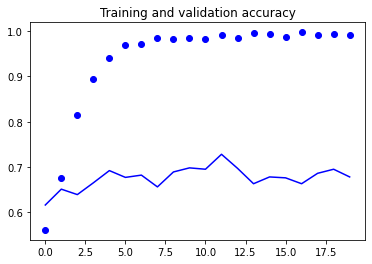

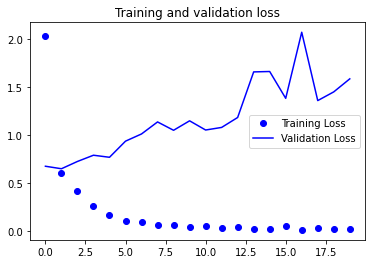

In [126]:
# Plot training results
plot_loss_acc(history)

The model performance still roughly the same as other method applied

### Standardization using ImageDataGenerator

Standardization is a data scaling technique that assumes that the distribution of the data is Gaussian and shifts the distribution of the data to have a mean of zero and a standard deviation of one.

Data with this distribution is referred to as a standard Gaussian. It can be beneficial when training neural networks as the dataset sums to zero and the inputs are small values in the rough range of about -3.0 to 3.0 (e.g. 99.7 of the values will fall within three standard deviations of the mean).

Standardization of images is achieved by subtracting the mean pixel value and dividing the result by the standard deviation of the pixel values.

#### feature wise

The mean and standard deviation statistics can be calculated on the training dataset

In [127]:
train_datagen_tmp = ImageDataGenerator()
test_datagen_tmp  = ImageDataGenerator()

train_generator_tmp = train_datagen_tmp.flow_from_directory(train_dir,
                                                    batch_size=2000, # all 2000 images loaded in one single batch
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
validation_generator_tmp =  test_datagen_tmp.flow_from_directory(validation_dir,
                                                         batch_size=1000, # all 1000 images loaded in one single batch
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

print('Batches train=%d, test=%d' % (len(train_generator_tmp), len(validation_generator_tmp)))
batchX_train, batchy_train = train_generator_tmp.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f' % (batchX_train.shape, batchX_train.min(),
                                                        batchX_train.max(), batchX_train.mean()))

batchX_validation, batchy_validation = validation_generator_tmp.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f' % (batchX_validation.shape, batchX_validation.min(),
                                                        batchX_validation.max(), batchX_validation.mean()))



# create generator that standardize pixel values
train_datagen = ImageDataGenerator( featurewise_center=True, featurewise_std_normalization=True )
test_datagen  = ImageDataGenerator( featurewise_center=True, featurewise_std_normalization=True )
print(batchX_train.shape)
print(batchX_validation.shape)

# calculate the mean on the training dataset
train_datagen.fit(batchX_train)
test_datagen.fit(batchX_validation)

# print the mean calculated on the training dataset.
print('train_datagen mean',  train_datagen.mean)
print('test_datagen mean',  test_datagen.mean)


# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


batchX, batchy = train_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f stddev=%.3f' % (batchX.shape, batchX.min(), batchX.max(),
                                                                    batchX.mean(), batchX.std()))

batchX, batchy = validation_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f stddev=%.3f' % (batchX.shape, batchX.min(), batchX.max(),
                                                                    batchX.mean(), batchX.std()))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Batches train=1, test=1
Batch shape=(2000, 150, 150, 3), min=0.000, max=255.000 mean=114.850
Batch shape=(1000, 150, 150, 3), min=0.000, max=255.000 mean=115.987
(2000, 150, 150, 3)
(1000, 150, 150, 3)
train_datagen mean [[[95.44372 95.44372 95.44372]]]
test_datagen mean [[[125.31679 115.11181 104.2717 ]]]
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Batch shape=(20, 150, 150, 3), min=-1.574, max=2.631 mean=0.430 stddev=1.051
Batch shape=(20, 150, 150, 3), min=-1.910, max=2.348 mean=0.098 stddev=0.928


In [128]:
# Train the model
model = create_model()
history = model.fit(
      train_generator,
      steps_per_epoch=train_steps_per_epoch,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=validation_steps_per_epoch,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 10s - loss: 0.6775 - accuracy: 0.5760 - val_loss: 0.6333 - val_accuracy: 0.6240 - 10s/epoch - 105ms/step
Epoch 2/20
100/100 - 10s - loss: 0.6287 - accuracy: 0.6465 - val_loss: 0.6105 - val_accuracy: 0.6640 - 10s/epoch - 95ms/step
Epoch 3/20
100/100 - 10s - loss: 0.5670 - accuracy: 0.7050 - val_loss: 0.5775 - val_accuracy: 0.6960 - 10s/epoch - 101ms/step
Epoch 4/20
100/100 - 10s - loss: 0.5092 - accuracy: 0.7545 - val_loss: 0.5660 - val_accuracy: 0.6960 - 10s/epoch - 98ms/step
Epoch 5/20
100/100 - 10s - loss: 0.4625 - accuracy: 0.7770 - val_loss: 0.6156 - val_accuracy: 0.6690 - 10s/epoch - 101ms/step
Epoch 6/20
100/100 - 10s - loss: 0.4113 - accuracy: 0.8295 - val_loss: 0.5498 - val_accuracy: 0.7050 - 10s/epoch - 100ms/step
Epoch 7/20
100/100 - 10s - loss: 0.3609 - accuracy: 0.8480 - val_loss: 0.6009 - val_accuracy: 0.7060 - 10s/epoch - 99ms/step
Epoch 8/20
100/100 - 10s - loss: 0.3213 - accuracy: 0.8665 - val_loss: 0.5682 - val_accuracy: 0.7270 - 10s/epoch - 99ms/s

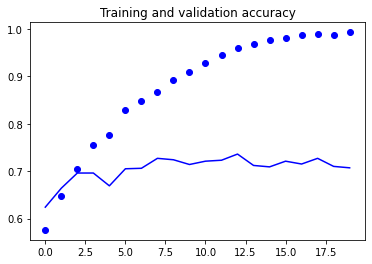

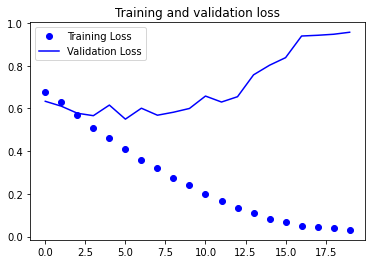

In [129]:
# Plot training results
plot_loss_acc(history)

roughly the same result as before

#### sample-wise standardization

In [130]:
# create generator that standardize pixel values
train_datagen = ImageDataGenerator( samplewise_center=True, samplewise_std_normalization=True )
test_datagen  = ImageDataGenerator( samplewise_center=True, samplewise_std_normalization=True )
print(batchX_train.shape)
print(batchX_validation.shape)


# print the mean calculated on the training dataset.
print('train_datagen mean',  train_datagen.mean)
print('test_datagen mean',  test_datagen.mean)


# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


batchX, batchy = train_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f stddev=%.3f' % (batchX.shape, batchX.min(), batchX.max(),
                                                                    batchX.mean(), batchX.std()))

batchX, batchy = validation_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f mean=%.3f stddev=%.3f' % (batchX.shape, batchX.min(), batchX.max(),
                                                                    batchX.mean(), batchX.std()))

(2000, 150, 150, 3)
(1000, 150, 150, 3)
train_datagen mean None
test_datagen mean None
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Batch shape=(20, 150, 150, 3), min=-3.597, max=4.949 mean=0.000 stddev=1.000
Batch shape=(20, 150, 150, 3), min=-5.112, max=5.364 mean=0.000 stddev=1.000


In [131]:
# Train the model
model = create_model()
history = model.fit(
      train_generator,
      steps_per_epoch=train_steps_per_epoch,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=validation_steps_per_epoch,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 10s - loss: 0.6783 - accuracy: 0.5730 - val_loss: 0.6307 - val_accuracy: 0.6250 - 10s/epoch - 104ms/step
Epoch 2/20
100/100 - 9s - loss: 0.6113 - accuracy: 0.6635 - val_loss: 0.7233 - val_accuracy: 0.5850 - 9s/epoch - 93ms/step
Epoch 3/20
100/100 - 9s - loss: 0.5533 - accuracy: 0.7175 - val_loss: 0.6977 - val_accuracy: 0.6100 - 9s/epoch - 93ms/step
Epoch 4/20
100/100 - 9s - loss: 0.4993 - accuracy: 0.7600 - val_loss: 0.5686 - val_accuracy: 0.7120 - 9s/epoch - 93ms/step
Epoch 5/20
100/100 - 9s - loss: 0.4401 - accuracy: 0.8035 - val_loss: 0.5836 - val_accuracy: 0.6840 - 9s/epoch - 94ms/step
Epoch 6/20
100/100 - 9s - loss: 0.3850 - accuracy: 0.8340 - val_loss: 0.5956 - val_accuracy: 0.6950 - 9s/epoch - 92ms/step
Epoch 7/20
100/100 - 9s - loss: 0.3408 - accuracy: 0.8545 - val_loss: 0.5392 - val_accuracy: 0.7300 - 9s/epoch - 94ms/step
Epoch 8/20
100/100 - 9s - loss: 0.2949 - accuracy: 0.8785 - val_loss: 0.6025 - val_accuracy: 0.7170 - 9s/epoch - 93ms/step
Epoch 9/20
10

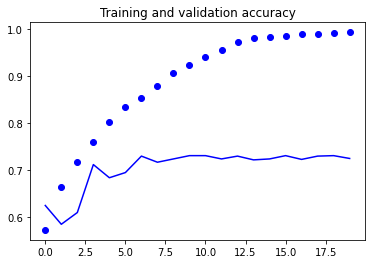

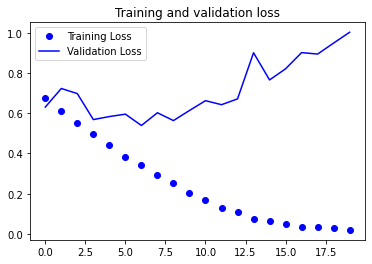

In [132]:
# Plot training results
plot_loss_acc(history)